# Goal
Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio. 

## Deliverable – 1. Exploratory data quality report reflecting the following– (20 marks)

### 1. Univariate analysis (12 marks)

In [438]:
#Importing all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#to ignore warninggs
import warnings
warnings.filterwarnings("ignore")

In [439]:
#loading the bank-full data that is provided in cvs format
bank_data = pd.read_csv("bank-full.csv")

In [440]:
bank_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [441]:
#checking the data types 
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [442]:
#shape of data
bank_data.shape

(45211, 17)

Dataset contains 45211 rows and 17 columns

In [443]:
#getting info of the dataframe
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We can see there are 2 differet types of datatypes i.e. object and int possessed by different columns and none of them contain null values.

In [444]:
#Checking the missing values
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

We can see there are no missing values present in any of the columns but from the above observations we can see there are many "unkown", "other" etc. which can be considered as missing values in the data.

In [445]:
#Checking the description of the individual attributes 
bank_data.describe(include = "all").T

count unique          top   freq      mean      std   min  25%  \
age        45211    NaN          NaN    NaN   40.9362  10.6188    18   33   
job        45211     12  blue-collar   9732       NaN      NaN   NaN  NaN   
marital    45211      3      married  27214       NaN      NaN   NaN  NaN   
education  45211      4    secondary  23202       NaN      NaN   NaN  NaN   
default    45211      2           no  44396       NaN      NaN   NaN  NaN   
balance    45211    NaN          NaN    NaN   1362.27  3044.77 -8019   72   
housing    45211      2          yes  25130       NaN      NaN   NaN  NaN   
loan       45211      2           no  37967       NaN      NaN   NaN  NaN   
contact    45211      3     cellular  29285       NaN      NaN   NaN  NaN   
day        45211    NaN          NaN    NaN   15.8064  8.32248     1    8   
month      45211     12          may  13766       NaN      NaN   NaN  NaN   
duration   45211    NaN          NaN    NaN   258.163  257.528     0  103   
campaign   45211    NaN          NaN    NaN   2.76384  3.09802     1    1   
pdays      45211    NaN          NaN    NaN   40.1978  100.129    -1   -1   
previous   45211    NaN          NaN    NaN  0.580323  2.30344     0    0   
poutcome   45211      4      unknown  36959       NaN      NaN   NaN  NaN   
Target     45211      2           no  39922       NaN      NaN   NaN  NaN   

           50%   75%     max  
age         39    48      95  
job        NaN   NaN     NaN  
marital    NaN   NaN     NaN  
education  NaN   NaN     NaN  
default    NaN   NaN     NaN  
balance    448  1428  102127  
housing    NaN   NaN     NaN  
loan       NaN   NaN     NaN  
contact    NaN   NaN     NaN  
day         16    21      31  
month      NaN   NaN     NaN  
duration   180   319    4918  
campaign     2     3      63  
pdays       -1    -1     871  
previous     0     0     275  
poutcome   NaN   NaN     NaN  
Target     NaN   NaN     NaN

In [446]:
#unique values of the object columns in the data exluding int and float columns
obj_columns = bank_data.select_dtypes(exclude = ["int64"]).columns.tolist()
for cols in obj_columns:
    print(f"Unique values of {cols} are {bank_data[cols].unique()}")

Unique values of job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values of marital are ['married' 'single' 'divorced']
Unique values of education are ['tertiary' 'secondary' 'unknown' 'primary']
Unique values of default are ['no' 'yes']
Unique values of housing are ['yes' 'no']
Unique values of loan are ['no' 'yes']
Unique values of contact are ['unknown' 'cellular' 'telephone']
Unique values of month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values of poutcome are ['unknown' 'failure' 'other' 'success']
Unique values of Target are ['no' 'yes']


In [447]:
#unique values in each columns
bank_data.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [448]:
#listing the number of value counts of each object columns
for column in obj_columns:
     print("\n" + column)
     print(bank_data[column].value_counts())


job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

poutcome
unknown    36959
failur

#### Dropping the unkown or missing values from each columns and rows

In [449]:
#Before dropping any rows or column, let copy the original dataset and we will perform all the analysis in copied dataset
bank_df1 = bank_data.copy()

In [450]:
bank_df1.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [451]:
#We can see from above analysis that Job column has 288 unkown rows with no category
#let's drop those unkown rows from the Job column in the dataset
bank_df1.drop(bank_df1[bank_df1.job == "unknown"].index, axis = 0, inplace = True)

In [452]:
bank_df1.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [453]:
#Similarly we can observe there are 1857 unkown rows in the education coulumn so we can get rid of those columns as well
bank_df1.drop(bank_df1[bank_df1.education == "unknown"].index, axis = 0, inplace = True)
bank_df1.education.value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64

In [454]:
#we can see there are very high number of unkown rows i.e. 29285 in contact column.
#We can drop the entire contact column
bank_df1.drop("contact", axis = 1, inplace = True)

In [455]:
#Similarly there are very high number of unknown entries in poutcome column i.e. 36959
#So it's better to drop the entire poutcome column
bank_df1.drop("poutcome", axis = 1, inplace = True)

In [456]:
bank_df1.describe().T

count         mean          std     min    25%    50%     75%  \
age       43193.0    40.764082    10.512640    18.0   33.0   39.0    48.0   
balance   43193.0  1354.027342  3042.103625 -8019.0   71.0  442.0  1412.0   
day       43193.0    15.809414     8.305970     1.0    8.0   16.0    21.0   
duration  43193.0   258.323409   258.162006     0.0  103.0  180.0   318.0   
campaign  43193.0     2.758178     3.063987     1.0    1.0    2.0     3.0   
pdays     43193.0    40.404070   100.420624    -1.0   -1.0   -1.0    -1.0   
previous  43193.0     0.584863     2.332672     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      58.0  
pdays        871.0  
previous     275.0

-The balance column has min value -8019 which can be considered either typo or outliers since the average annual  balance shouldn't be negative.

-we can see that there are numerous entries of 0 or -1 in pdays and previous columns.Dropping these columns should affect the analysis.

#### Checking the presence of outliers in the dataset and vizualizing them using univariate plots

##### Age

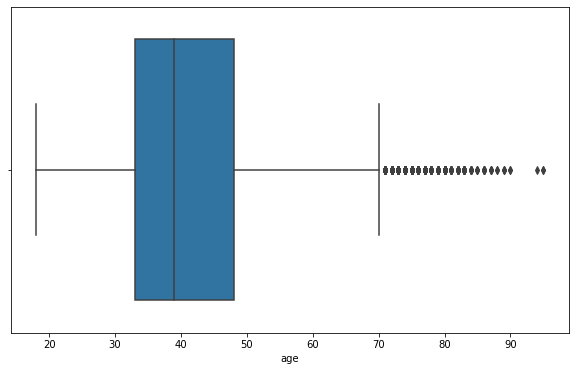

In [457]:
# Age
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["age"])
plt.show()

By looking at the boxplot, we can obseerve there are some outliers in the age column

In [458]:
#Calculating the outliers in the age distribution column
print("The outliers are above", bank_df1["age"].quantile(q = 0.75) 
      + 1.5*(bank_df1["age"].quantile(q = 0.75) - bank_df1["age"].quantile(q = 0.25)), "of years age")

The outliers are above 70.5 of years age


In [459]:
#calculating the percentage of outliers in age column
age_outliers = bank_df1[bank_df1["age"] > 70.5]["age"].count()
total_clients_age  = len(bank_df1)
print("Percentage outliers = ", round(age_outliers/total_clients_age * 100, 2), "%")

Percentage outliers =  1.0 %


As we can see there is just 1% of outliers in age column which is very less. So we can either fit the model with or without age column.

##### Balance

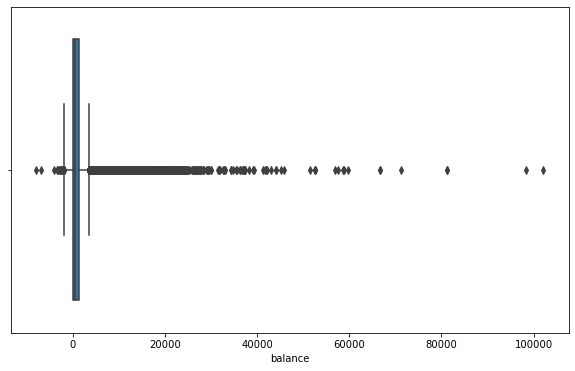

In [460]:
#balance
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["balance"])
plt.show()

In [461]:
#Calculating the outliers in the balance distribution column
print("The outliers are above", bank_df1["balance"].quantile(q = 0.75) 
      + 1.5*(bank_df1["balance"].quantile(q = 0.75) - bank_df1["balance"].quantile(q = 0.25)))

The outliers are above 3423.5


In [462]:
#calculating the percentage of outliers in age column
balance_outliers = bank_df1[bank_df1["balance"] > 70.5]["balance"].count()
total_clients_balance  = len(bank_df1)
print("Percentage outliers = ", round(balance_outliers/total_clients_balance * 100, 2), "%")

Percentage outliers =  75.02 %


So we can see there is about 75% of ouliers in balance column which is very high.

In [463]:
from scipy.stats import zscore
bank_df1["balance_outliers"] = zscore(bank_df1["balance"])

In [464]:
bank_df1.drop(bank_df1[(bank_df1["balance_outliers"] > 3) | (bank_df1["balance_outliers"] < -3)].index,axis=0,inplace=True)

In [465]:
# We don't need the zscore column anymore
bank_df1.drop("balance_outliers",axis=1,inplace=True)

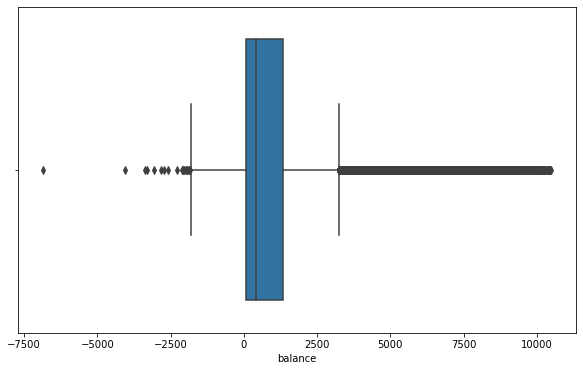

In [466]:
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["balance"])
plt.show()

We can still see some ouliers to the negative side . so let's drop those too.

In [467]:
bank_df1.drop(bank_df1[bank_df1.balance <- 2500].index,axis=0,inplace=True)

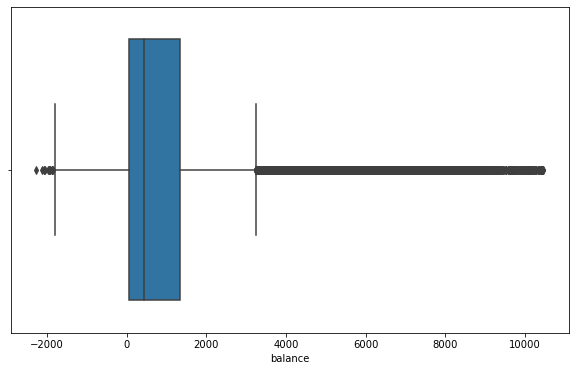

In [468]:
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["balance"])
plt.show()

#### day

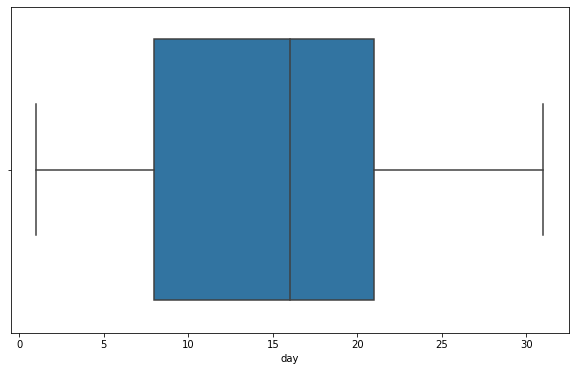

In [469]:
#checking the outliers in day column
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["day"])
plt.show()

The box plot shows no outliers in day column

#### Duration

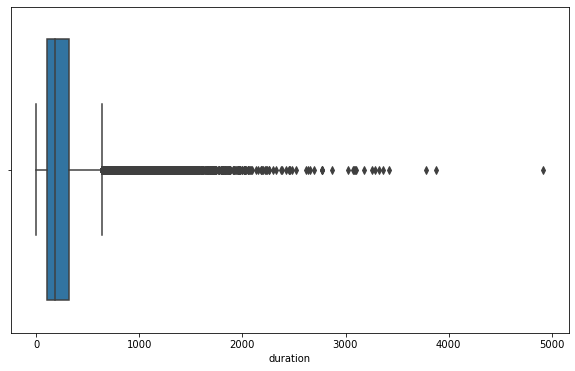

In [470]:
#checking the outliers in duration column
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["duration"])
plt.show()

We can see there are outliers in duration column. Since we don't know the duration in advance and so is the result, we can drop this entire duration column and not concerned about the outliers.

In [471]:
bank_df1.drop("duration",axis=1,inplace=True) 

#### pdays

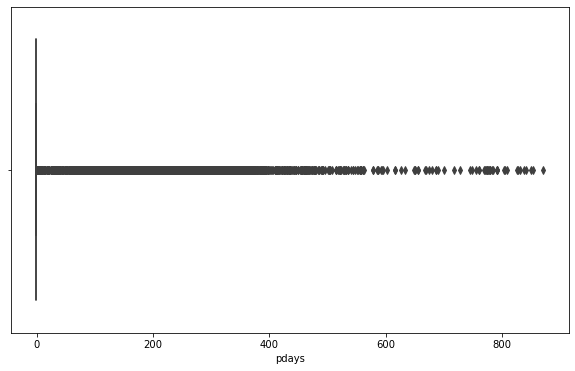

In [472]:
#checking the outliers in duration column
plt.figure(figsize = (10, 6))
sns.boxplot(bank_df1["pdays"])
plt.show()

Since most of the entries in pdays column have specific value, it's better to drop the pdays column for further analysis

In [473]:
bank_df1.drop("pdays",axis=1,inplace=True) 

#### previous

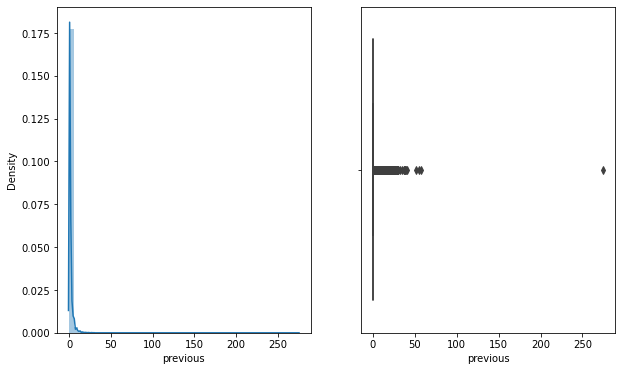

In [475]:
#checking the outliers in duration column
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.distplot(bank_df1["previous"])
plt.subplot(1,2,2)
sns.boxplot(bank_df1["previous"])
plt.show()


We can see large number of entries in "previous" column has 0. so we can drop the previous column

In [476]:
bank_df1.drop("previous",axis=1,inplace=True)

In [477]:
bank_df1.shape

(42476, 12)

In [478]:
bank_df1.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
5   35    management  married   tertiary      no      231     yes   no    5   
6   28    management   single   tertiary      no      447     yes  yes    5   

  month  campaign Target  
0   may         1     no  
1   may         1     no  
2   may         1     no  
5   may         1     no  
6   may         1     no

### 2. Multivariate analysis (8 marks)

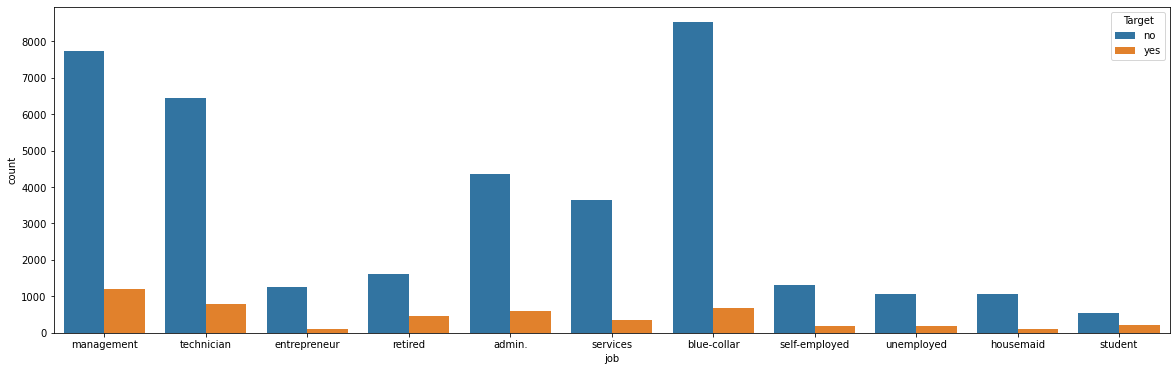

In [479]:
#Relationship between job and target columns 
plt.figure(figsize=(20, 6))
sns.countplot("job", hue = "Target", data = bank_df1)

plt.show()

we can see large number of subscriber are having management and technician job title whereas vey less number of suscriber are having entrepreneur and housemaid job title.

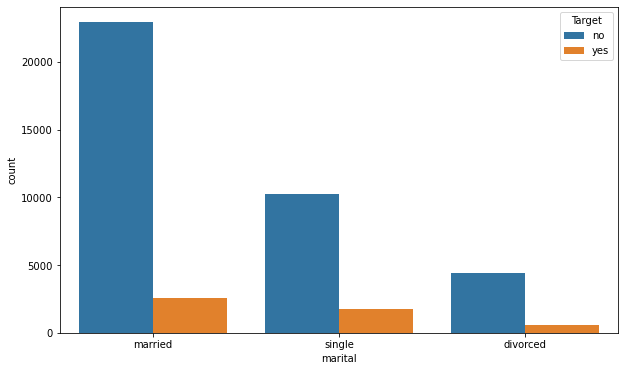

In [480]:
#relationship between marital and target columns 
plt.figure(figsize=(10, 6))
sns.countplot("marital", hue = "Target", data = bank_df1)
plt.show()

So from the above plot we can conclude that married and single clients are more likely to subscribe than the divorced ones

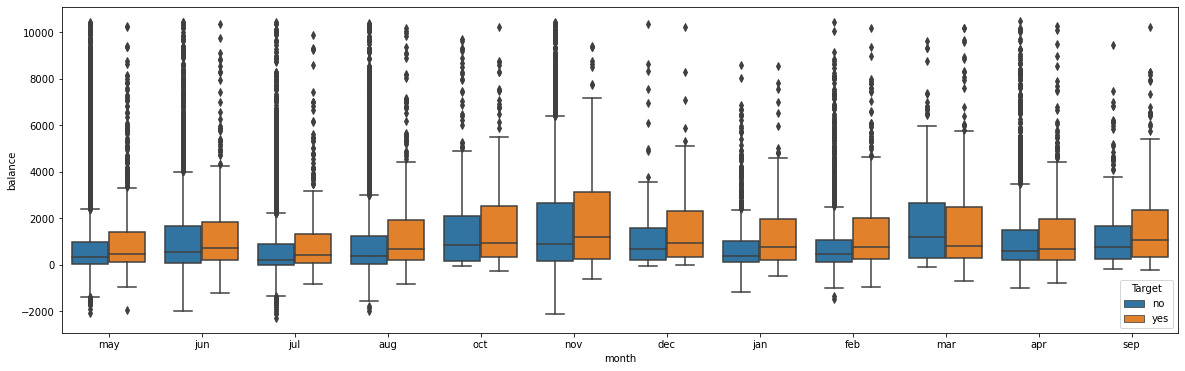

In [481]:
#relation between month and balance with target column
plt.figure(figsize=(20, 6))
sns.boxplot(x="month", y="balance", hue="Target",data=bank_df1)
plt.show()

From the above box plot between balance, month and target, we can observe that people having higher balance are more likely to subscribe. And we can also observe that there are more higher number of subscriber in March, September, October and November.

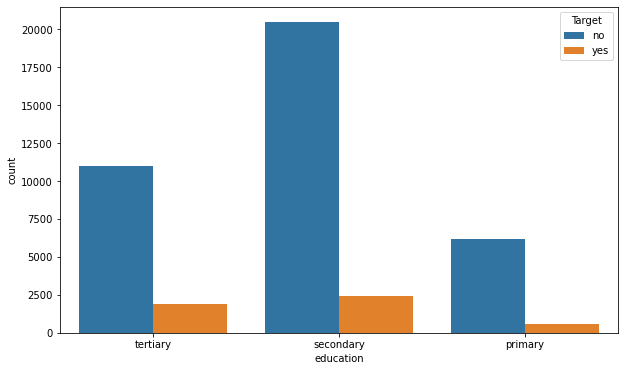

In [482]:
#relation between education and target column
plt.figure(figsize=(10, 6))
sns.countplot("education", hue = "Target", data = bank_df1)
plt.show()

Clients having secondary education are the highest subscriber followed by secondary and primary.

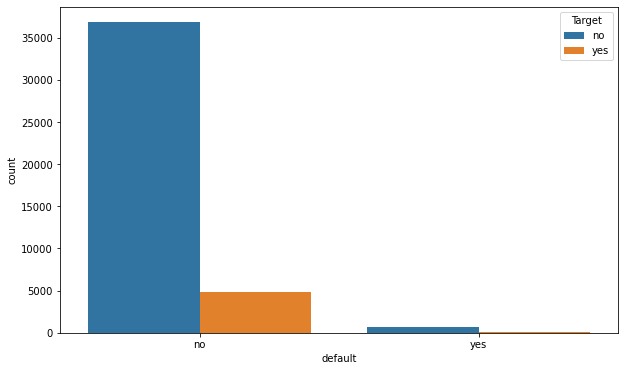

In [483]:
#relation between default and target column
plt.figure(figsize=(10, 6))
sns.countplot("default", hue = "Target", data = bank_df1)
plt.show()

The credit in deault for most of the clients are very less and tends to subscriber more than who are in defaults.

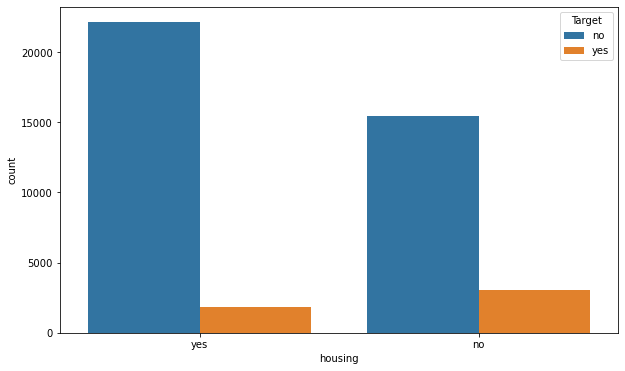

In [484]:
#relation between housing and target column
plt.figure(figsize=(10, 6))
sns.countplot("housing", hue = "Target", data = bank_df1)
plt.show()

More number of clients have housing loan and they subscribe less than the clients who don't have housing loan.

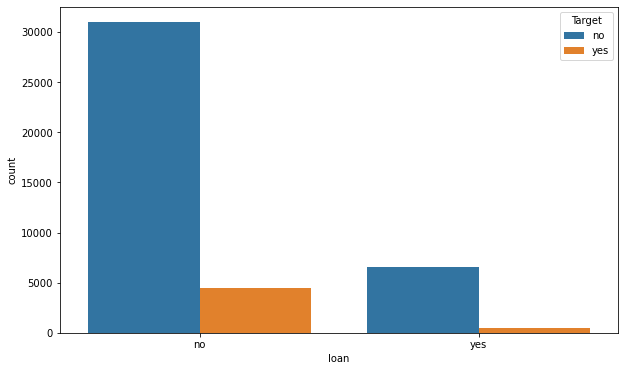

In [485]:
#relation between loan and target column
plt.figure(figsize=(10, 6))
sns.countplot("loan", hue = "Target", data = bank_df1)
plt.show()

Many clients don't have personal loan and they subscriber more than the clients have personal loan

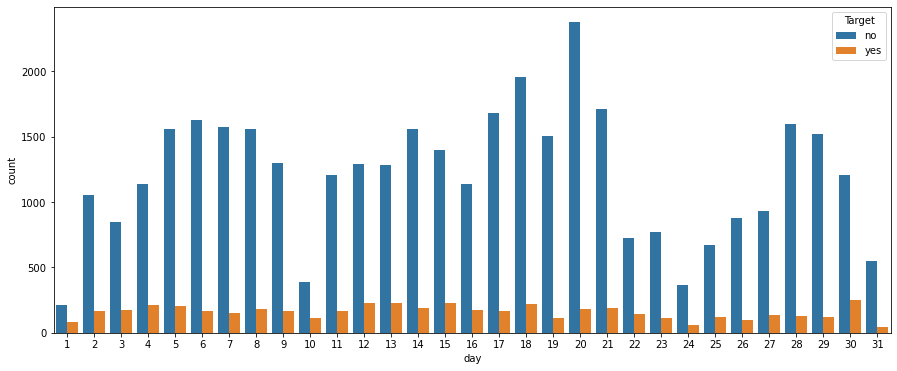

In [486]:
#relation between day and target column
plt.figure(figsize=(15, 6))
sns.countplot("day", hue = "Target", data = bank_df1)
plt.show()

Here we can't really establish any solid relation between particular day and the number of subscriber.

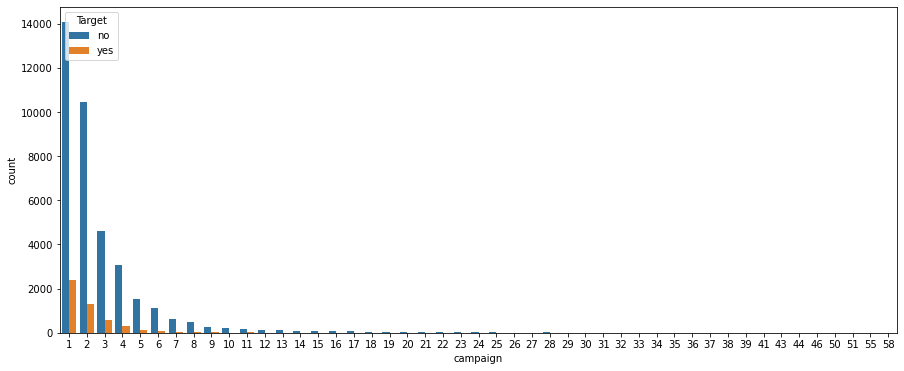

In [487]:
#relation between campaign and target column
plt.figure(figsize=(15, 6))
sns.countplot("campaign", hue = "Target", data = bank_df1)
plt.show()

Here we can observe clients who were contacted less are better subscriber.

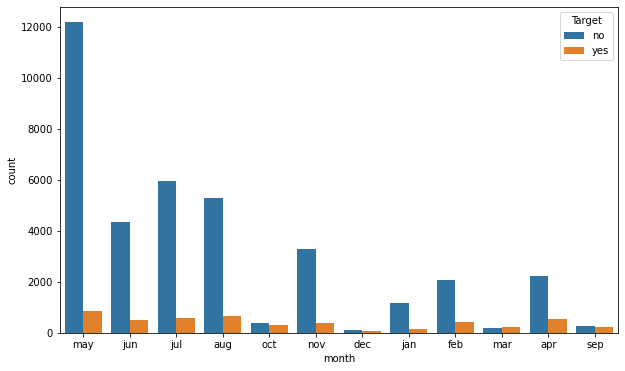

In [488]:
#relation between month and target column
plt.figure(figsize=(10, 6))
sns.countplot("month", hue = "Target", data = bank_df1)
plt.show()

There are more number of subscribers in consecutive five months i.e. from April to August than the rest of the months.

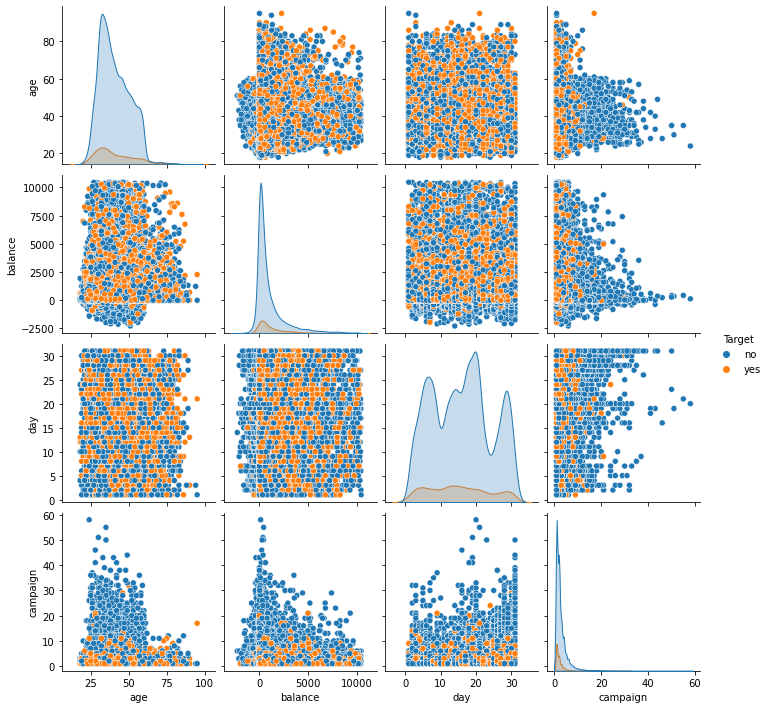

In [489]:
# let's plot the pairplot and check the relation between multiple numerical variables columns with Target column.
sns.pairplot(bank_df1[["age", "balance", "day", "campaign", "Target"]], hue = "Target")

## Deliverable – 2 (Prepare the data for analytics) – (10)

##### lets perform the one-hot encoding to the columns which have categorigal values and create dummy variables for them

In [490]:
#let's create the dummy variables for job and drop the original job column
bank_df1 = pd.concat([bank_df1, pd.get_dummies(bank_df1.job,drop_first=True)], axis=1).drop("job",axis=1)

In [491]:
#let's create the dummy variables for marital and drop the original marital column
bank_df1 = pd.concat([bank_df1, pd.get_dummies(bank_df1.marital,drop_first=True)], axis=1).drop("marital",axis = 1)

In [492]:
#let's create the dummy variables for education and drop the original education column
bank_df1 = pd.concat([bank_df1, pd.get_dummies(bank_df1.education,drop_first=True)], axis=1).drop("education",axis=1)

In [493]:
#let's create the dummy variables for month and drop the original month column
bank_df1 = pd.concat([bank_df1, pd.get_dummies(bank_df1.month, drop_first = True)], axis = 1).drop("month",axis = 1)

In [494]:
#Replace values yes with 1 and no with 0 in rest of the categorical columns
#default
bank_df1.default = bank_df1.default.map({"yes":1,"no":0})

In [495]:
#housing
bank_df1.housing = bank_df1.housing.map({"yes":1,"no":0})

In [496]:
#loan
bank_df1.loan = bank_df1.loan.map({"yes":1,"no":0})

In [497]:
#Target
bank_df1.Target = bank_df1.Target.map({"yes":1,"no":0})

In [498]:
bank_df1.head()

age  default  balance  housing  loan  day  campaign  Target  blue-collar  \
0   58        0     2143        1     0    5         1       0            0   
1   44        0       29        1     0    5         1       0            0   
2   33        0        2        1     1    5         1       0            0   
5   35        0      231        1     0    5         1       0            0   
6   28        0      447        1     1    5         1       0            0   

   entrepreneur  ...  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  
0             0  ...    0    0    0    0    0    0    1    0    0    0  
1             0  ...    0    0    0    0    0    0    1    0    0    0  
2             1  ...    0    0    0    0    0    0    1    0    0    0  
5             0  ...    0    0    0    0    0    0    1    0    0    0  
6             0  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 33 columns]

In [499]:
bank_df1.shape

(42476, 33)

##### After normalizing and scaling, the data is ready for modelling. 

In [500]:
#let's import the necessary libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [501]:
# Separating dependent and independent variables
X = bank_df1.drop(['Target'], axis = 1)
y = bank_df1['Target']

##### Splitting the data into training and test set in the ratio of 70:30 respectively

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [503]:
X_train.shape, X_test.shape

((29733, 32), (12743, 32))

In [504]:
y_train.shape, y_test.shape

((29733,), (12743,))

In [505]:
# It's better to check the effect of scaling on the dataset, we create another set of data with scaling function applied to it
from sklearn import preprocessing
SX = preprocessing.scale(X)
SX_train, SX_test, y_train, y_test = train_test_split(SX, y, test_size = 0.3, random_state = 42)

In [506]:
SX_train.shape, SX_test.shape

((29733, 32), (12743, 32))

## Deliverable – 3 (create the ensemble model) – (30)

##### Logistic Regression

In [507]:
# Importing lbraries from the SCIKIT LEARN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_a = LogisticRegression()

# Applying training data to the logistic regression model
model_a.fit(X_train, y_train)

# Predicting the test results
y_predict = model_a.predict(X_test)

# Caculating the coefficients of logistic regression model
t = list(X_train.columns)
coef_df = pd.DataFrame(model_a.coef_, columns= t)
coef_df["intercept"] = model_a.intercept_
print(coef_df)

        age   default   balance   housing      loan       day  campaign  \
0 -0.005114 -0.060613  0.000081 -0.857074 -0.473786 -0.007141 -0.115844   

   blue-collar  entrepreneur  housemaid  ...       feb       jan       jul  \
0    -0.361881     -0.091976  -0.065704  ... -0.027657 -0.081348 -0.273287   

        jun       mar       may       nov       oct       sep  intercept  
0 -0.271379  0.319339 -0.572741 -0.246968  0.307714  0.294267  -0.440687  

[1 rows x 33 columns]


In [508]:
# Calculating the model score and print confusion matrix
model_a_score = model_a.score(X_test, y_test)

print(model_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8839362787412697
[[11261     4]
 [ 1475     3]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11265
           1       0.43      0.00      0.00      1478

    accuracy                           0.88     12743
   macro avg       0.66      0.50      0.47     12743
weighted avg       0.83      0.88      0.83     12743



In [509]:
print("Test score: {}".format(model_a.score(X_test, y_test) * 100))

Test score: 88.39362787412696


###### Applying Scaled training data to the logistic regression model

In [510]:
model_b = LogisticRegression()
model_b.fit(SX_train, y_train)

# Predicting the test results
y_predict = model_b.predict(SX_test)

# Calculating the coefficients of logistic regression model

coef_df = pd.DataFrame(model_b.coef_, columns= t)
coef_df["intercept"] = model_b.intercept_
print(coef_df)

        age  default   balance   housing      loan       day  campaign  \
0  0.004618 -0.03859  0.107547 -0.308469 -0.170908 -0.032517 -0.307204   

   blue-collar  entrepreneur  housemaid  ...       feb       jan       jul  \
0    -0.066128     -0.052114  -0.030493  ... -0.094409 -0.157211 -0.259001   

        jun       mar       may       nov       oct       sep  intercept  
0 -0.225088  0.128916 -0.417854 -0.222228  0.088514  0.104291  -2.273393  

[1 rows x 33 columns]


In [511]:
#Calculating the model score and print confusion matrix
model_b_score = model_b.score(SX_test, y_test)
print(model_b_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8845640743937848
[[11150   115]
 [ 1356   122]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11265
           1       0.51      0.08      0.14      1478

    accuracy                           0.88     12743
   macro avg       0.70      0.54      0.54     12743
weighted avg       0.85      0.88      0.85     12743



In [512]:
print("Test score: {}".format(model_b.score(SX_test, y_test) * 100))

Test score: 88.45640743937848


##### Decision Tree Alogrithm

In [513]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system

In [514]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state =42)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [515]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9999327346719133
0.8190379031625206


In [516]:
train_char_label = ['No', 'Yes']
Bankdata_Tree_File = open('bankdata_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file = Bankdata_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Bankdata_Tree_File.close()

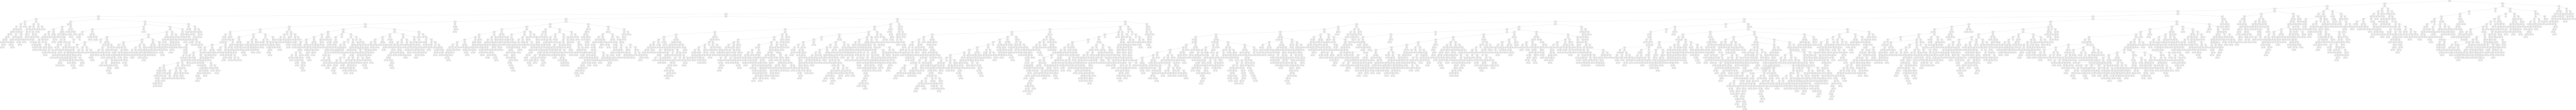

In [517]:
retCode = system("dot -Tpng bankdata_tree.dot -o bankdata_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bankdata_tree.png"))


In [518]:
# Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=42)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8855144115965425
0.8841717021109629


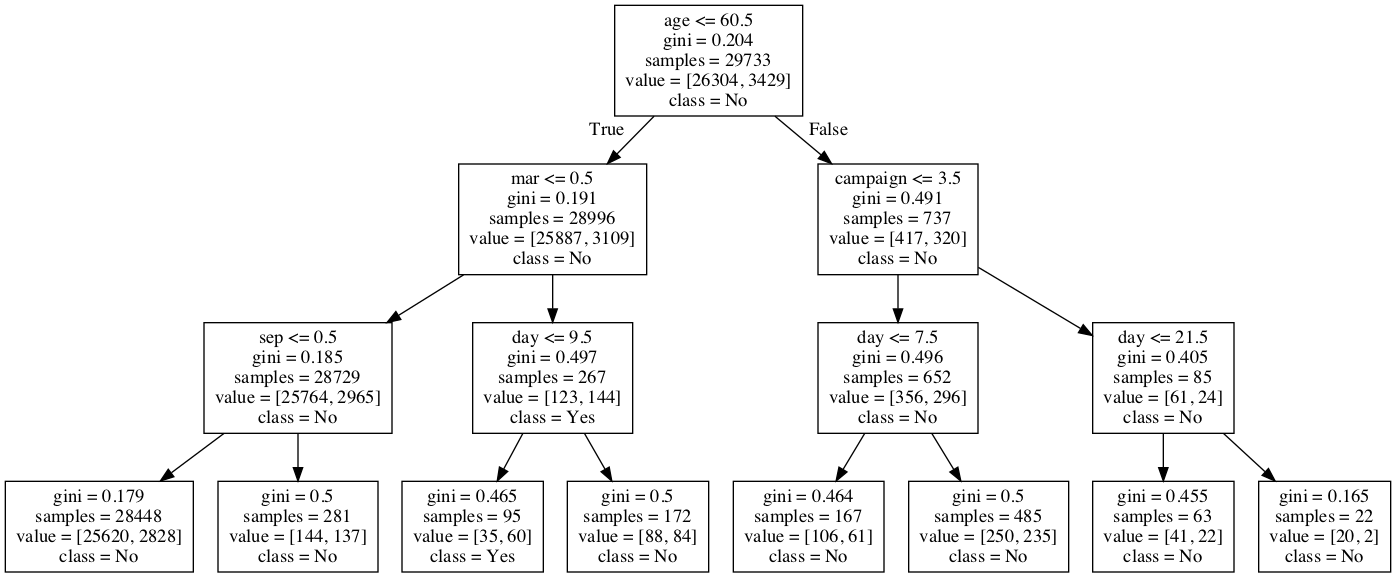

In [519]:
train_char_label = ['No', 'Yes']
Bankdata_Tree_FileR = open('bankdata_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Bankdata_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Bankdata_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng bankdata_treeR.dot -o bankdata_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bankdata_treeR.png"))

In [520]:
# importance of features in the tree building ( The importance of a feature is computed as the 

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
age            0.438085
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
day            0.023432
campaign       0.012629
blue-collar    0.000000
entrepreneur   0.000000
housemaid      0.000000
management     0.000000
retired        0.000000
self-employed  0.000000
services       0.000000
student        0.000000
technician     0.000000
unemployed     0.000000
married        0.000000
single         0.000000
secondary      0.000000
tertiary       0.000000
aug            0.000000
dec            0.000000
feb            0.000000
jan            0.000000
jul            0.000000
jun            0.000000
mar            0.286866
may            0.000000
nov            0.000000
oct            0.000000
sep            0.238988


0.8841717021109629


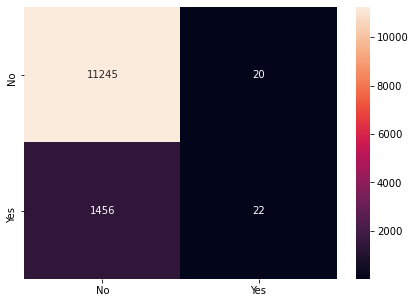

In [521]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

#Visualizing the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [523]:
dTreeRS = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=42)
dTreeRS.fit(SX_train, y_train)
print(dTreeRS.score(SX_train, y_train))
print(dTreeRS.score(SX_test, y_test))

0.8855144115965425
0.8841717021109629


##### Build the ensemble models

##### Bagging

In [524]:
#importing required libraray for Bagging from sklearn
from sklearn.ensemble import BaggingClassifier
bg_cl = BaggingClassifier(base_estimator = dTree, n_estimators = 50,random_state = 42)

bg_cl = bg_cl.fit(X_train, y_train)

# Predicting the test results
y_predict = bg_cl.predict(X_test)


0.8856627167856863
[[11031   234]
 [ 1223   255]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11265
           1       0.52      0.17      0.26      1478

    accuracy                           0.89     12743
   macro avg       0.71      0.58      0.60     12743
weighted avg       0.86      0.89      0.86     12743



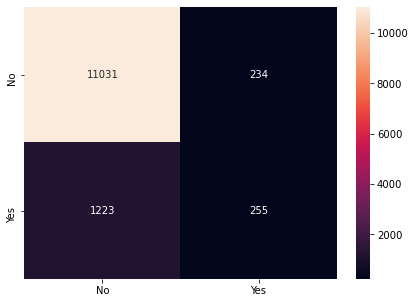

In [525]:
# Calculating the model score and print confusion matrix
bg_cl_score = bg_cl.score(X_test, y_test)

print(bg_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

#visualizing the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict,labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True ,fmt = 'g')

##### Applying Scaled training data to the Bagging

In [526]:
bgs_cl = BaggingClassifier(base_estimator = dTree, n_estimators = 50,random_state = 42)

bgs_cl = bgs_cl.fit(SX_train, y_train)

# Predicting the test results
y_predict = bgs_cl.predict(SX_test)

In [527]:
bgs_cl_score = bgs_cl.score(SX_test, y_test)

print(bgs_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8857411912422507
[[11031   234]
 [ 1222   256]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11265
           1       0.52      0.17      0.26      1478

    accuracy                           0.89     12743
   macro avg       0.71      0.58      0.60     12743
weighted avg       0.86      0.89      0.86     12743



##### AdaBoosting

In [528]:
from sklearn.ensemble import AdaBoostClassifier
ab_cl = AdaBoostClassifier(n_estimators = 10, random_state = 42)

ab_cl = ab_cl.fit(X_train, y_train)

# Predicting the test results
y_predict = ab_cl.predict(X_test)

0.8822883151534175
[[11133   132]
 [ 1368   110]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11265
           1       0.45      0.07      0.13      1478

    accuracy                           0.88     12743
   macro avg       0.67      0.53      0.53     12743
weighted avg       0.84      0.88      0.84     12743



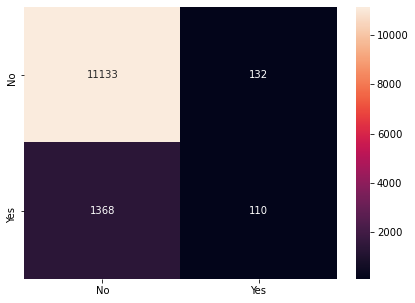

In [529]:
# Calculating the model score and print confusion matrix
ab_cl_score = ab_cl.score(X_test, y_test)

print(ab_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

#visualizing the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict,labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True ,fmt = 'g')

##### Applying Scaled training data to the AdaBoosting

In [530]:
abs_cl = AdaBoostClassifier(n_estimators = 10, random_state = 42)

abs_cl = abs_cl.fit(SX_train, y_train)

# Predicting the test results
y_predict = abs_cl.predict(SX_test)

In [531]:
# Calculating the model score and print confusion matrix
abs_cl_score = abs_cl.score(SX_test, y_test)

print(abs_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8822883151534175
[[11133   132]
 [ 1368   110]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11265
           1       0.45      0.07      0.13      1478

    accuracy                           0.88     12743
   macro avg       0.67      0.53      0.53     12743
weighted avg       0.84      0.88      0.84     12743



##### GradientBoosting

In [532]:
from sklearn.ensemble import GradientBoostingClassifier
gb_cl = GradientBoostingClassifier(n_estimators = 50,random_state = 42)

gb_cl = gb_cl.fit(X_train, y_train)

# Predicting the test results
y_predict = gb_cl.predict(X_test)

0.8840932276543985
[[11176    89]
 [ 1388    90]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11265
           1       0.50      0.06      0.11      1478

    accuracy                           0.88     12743
   macro avg       0.70      0.53      0.52     12743
weighted avg       0.84      0.88      0.84     12743



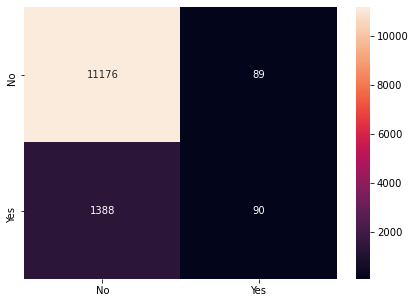

In [533]:
# Calculating the model score and print confusion matrix
gb_cl_score = gb_cl.score(X_test, y_test)

print(gb_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

#visualizing the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict,labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True ,fmt = 'g')

##### Applying scaled training data to GradientBoosting

In [534]:
gbs_cl = GradientBoostingClassifier(n_estimators = 50,random_state = 42)

gbs_cl = gbs_cl.fit(SX_train, y_train)

# Predicting the test results
y_predict = gbs_cl.predict(SX_test)

In [535]:
# Calculating the model score and print confusion matrix
gbs_cl_score = gbs_cl.score(SX_test, y_test)

print(gbs_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8840932276543985
[[11176    89]
 [ 1388    90]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11265
           1       0.50      0.06      0.11      1478

    accuracy                           0.88     12743
   macro avg       0.70      0.53      0.52     12743
weighted avg       0.84      0.88      0.84     12743



##### RandomForest Classifier

In [536]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 12)

rf_cl = rf_cl.fit(X_train, y_train)

# Predicting the test results
y_predict = rf_cl.predict(X_test)

0.8873891548301028
[[11071   194]
 [ 1241   237]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11265
           1       0.55      0.16      0.25      1478

    accuracy                           0.89     12743
   macro avg       0.72      0.57      0.59     12743
weighted avg       0.86      0.89      0.86     12743



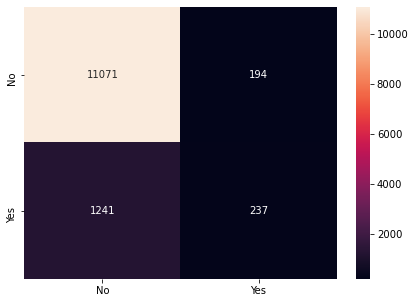

In [537]:
# Calculating the model score and print confusion matrix
rf_cl_score = rf_cl.score(X_test, y_test)

print(rf_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

#visualizing the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict,labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True ,fmt = 'g')

##### Applying scaled training data to Random Forest

In [538]:
rfs_cl = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 12)

rfs_cl = rf_cl.fit(SX_train, y_train)

# Predicting the test results
y_predict = rf_cl.predict(SX_test)

In [539]:
# Calculating the model score and print confusion matrix
rfs_cl_score = rfs_cl.score(SX_test, y_test)

print(rfs_cl_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8871537314604097
[[11067   198]
 [ 1240   238]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11265
           1       0.55      0.16      0.25      1478

    accuracy                           0.89     12743
   macro avg       0.72      0.57      0.59     12743
weighted avg       0.86      0.89      0.86     12743



##### Dataframe to compare diffrent models and the matrices

In [540]:
modelsA = pd.DataFrame({
                'Models': ["Logistic regresssion", "Descison Tree", "Bagging", 
                           "AdaBoosting", "Gradient boosting", "RandomForest Classifier"],
                'TestScore':  [model_a_score, dTreeR.score(X_test , y_test), 
                               bg_cl_score, ab_cl_score, gb_cl_score, rf_cl_score]})

modelsA.sort_values(by='TestScore', ascending=False)

Models  TestScore
5  RandomForest Classifier   0.887389
2                  Bagging   0.885663
1            Descison Tree   0.884172
4        Gradient boosting   0.884093
0     Logistic regresssion   0.883936
3              AdaBoosting   0.882288

In [541]:
modelsB = pd.DataFrame({
                'Models': ["Scaled Logistic regresssion", "Scaled Descison Tree", " Scaled Bagging", 
                           "Scaled AdaBoosting", "Scaled Gradient boosting", "Scaled RandomForest Classifier"],
                'TestScore':  [model_b_score, dTreeRS.score(SX_train, y_train), 
                               bgs_cl_score, abs_cl_score, gbs_cl_score, rfs_cl_score]})

modelsB.sort_values(by='TestScore', ascending=False)

Models  TestScore
5  Scaled RandomForest Classifier   0.887154
2                  Scaled Bagging   0.885741
1            Scaled Descison Tree   0.885514
0     Scaled Logistic regresssion   0.884564
4        Scaled Gradient boosting   0.884093
3              Scaled AdaBoosting   0.882288

### Conclusion

##### The classification goal is to predict and build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

>For this I have used different models to predict the best outcome. I have used six diffrent models i.e Logistic Regression, Decision Tree and ensemble techniques such as Bagging, AdaBoosting, Gradient Boosting and Random Forest Classifierand compare their diffrent matrices among each other.

> I have also applied the scaled dataset to the same models to increase the chances of prediction.

> Among all the models, we can observe that Random Forest Classifier(Ensemble technique) predicts the best outcome as it's Test Score(0.887389) is the highest amongst all models. 

> The Random Forest Classifier is followed by Bagging(0.885663), Decision Tree(0.884172), Gradient Boosting(0.884093, Logistic Regression(0.883936) and Adaboosting(0.88288).

>Even after scaling the dataset, Random Forest Classifier stands out the best model to predict the outcome followed by Bagging, Decision Tree, Logistic Regression, Gradient Boosting, AdaBoosting